In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
%matplotlib inline
%config InlineBackend.rc

{'figure.figsize': (6.0, 4.0),
 'figure.facecolor': (1, 1, 1, 0),
 'figure.edgecolor': (1, 1, 1, 0),
 'font.size': 10,
 'figure.dpi': 72,
 'figure.subplot.bottom': 0.125}

In [139]:
forest_fire = pd.read_csv('forestfires.csv')
forest_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [140]:
forest_fire.info()
#info regarding if any of elements in the dataset are null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [141]:
forest_fire.describe()
#decribes statistical data about the target features in the classification

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<ipython-input-142-88e70cf4d638>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  forest_fire.hist(ax=a1,bins=18)


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

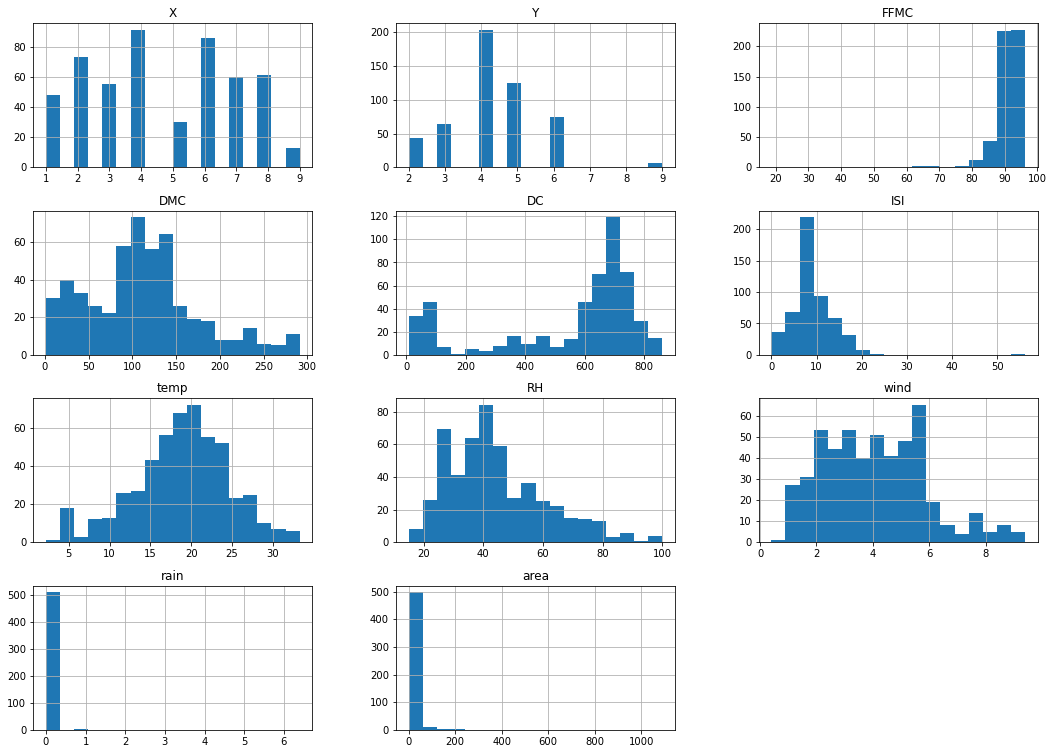

In [142]:
#graphical representation of data
plt1=plt.figure(figsize=(18,13))
a1 = plt1.gca()
forest_fire.hist(ax=a1,bins=18)

In [144]:
#creating sub dataframes for plotting categorical data
t1='area'
df1=forest_fire.drop(columns=t1)
cat_col = df1.select_dtypes(include='object').columns.tolist()
cat_col

['month', 'day']

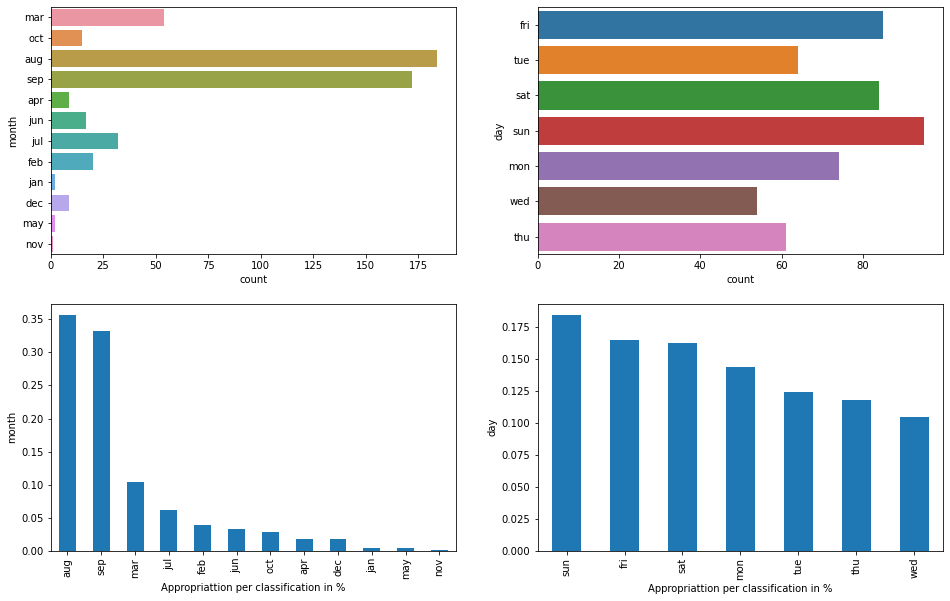

In [111]:
#analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_col,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+2)
    forest_fire[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('Appropriattion per classification in %')
plt.show()

In [145]:
forest_fire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [146]:
forest_fire['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

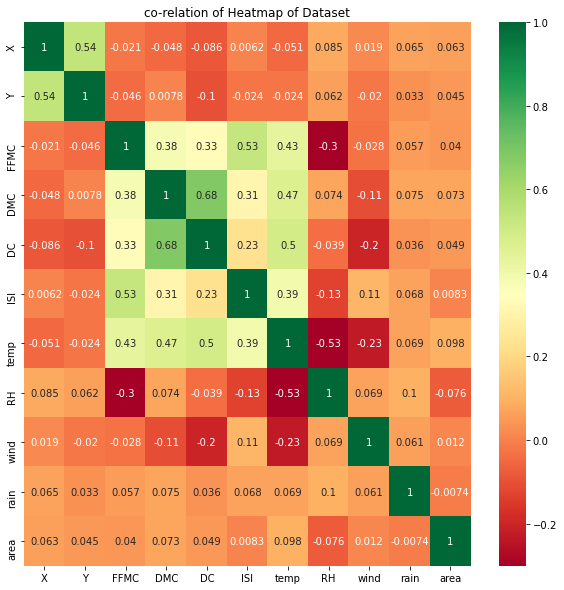

In [147]:
#co-relation heat map between all vareiables in the dataset.
corl = forest_fire.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corl,annot=True,cmap="RdYlGn",robust=True)
plt.title("co-relation of Heatmap of Dataset")
plt.show()

<AxesSubplot:title={'center':'Fire on land co-ordinated for months'}, xlabel='X', ylabel='Y'>

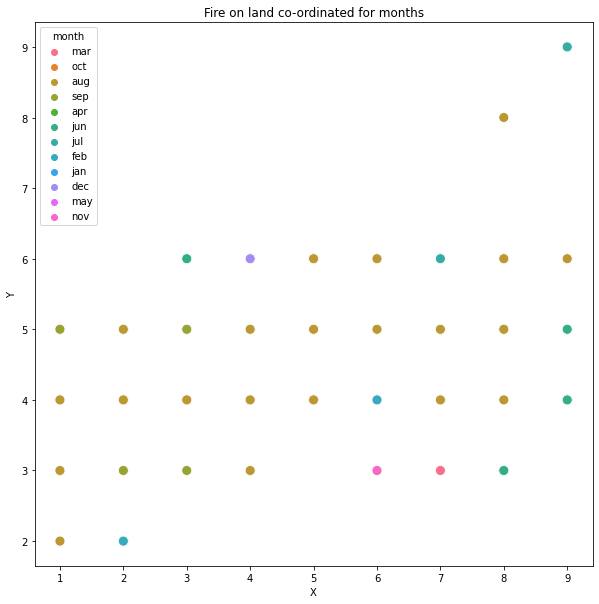

In [148]:
#scatterplot for x and y co-ordinated for monthsa1
plt.figure(figsize=(10,10))
plt.title("Fire on land co-ordinated for months")
sns.scatterplot(x=forest_fire['X'],y=forest_fire['Y'],hue=forest_fire['month'],s=100)


<AxesSubplot:title={'center':'scatterPlot'}, xlabel='temp', ylabel='wind'>

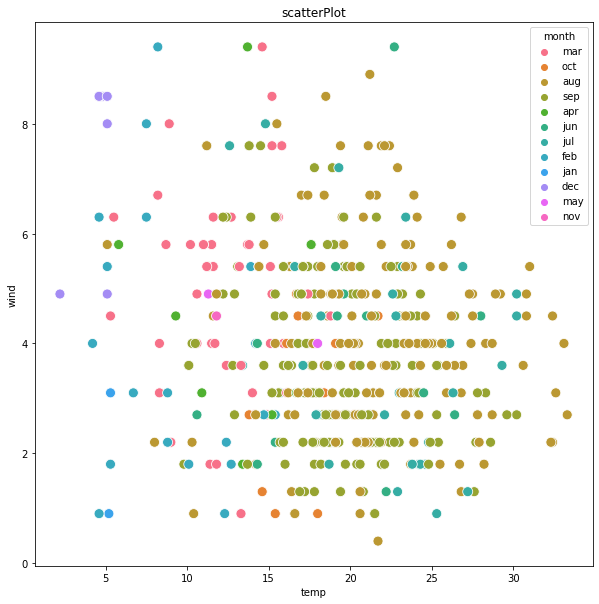

In [149]:
#scatter plot for temprature and wind magnitutdes color coded based on months
plt.figure(figsize=(10,10))
plt.title('scatterPlot')
sns.scatterplot(x=forest_fire['temp'],y=forest_fire['wind'],hue=forest_fire['month'],s=100)

In [150]:
forest_fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
forest_fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [151]:
#defining the prediction function
def prediction_training(forest_fire):
    forest_fire = forest_fire.copy()
        
    i=forest_fire['month']
    j = forest_fire.drop('month',axis=1)
    
    i_train,i_test,j_train,j_test = train_test_split(j,i,train_size=0.9,shuffle=True,random_state=1)
    scale = StandardScaler()
    scale.fit(i_train)
    i_train = pd.DataFrame(scale.transform(i_train),index=i_train.index,columns=i_train.columns)
    i_test = pd.DataFrame(scale.transform(i_test),index=i_test.index,columns=i_test.columns)
    
    return i_train,i_test,j_train,j_test


In [153]:

i_train , i_test , j_train, j_test = prediction_training(forest_fire)
i_train

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
147,1.423235,-1.085877,-1.104414,-1.067596,-0.546209,0.534071,-1.240533,0.903235,-0.996505,-0.221057,-0.075925,-0.186707
399,1.854940,0.550858,-0.620843,0.478976,-0.924489,-0.953988,1.094796,1.544927,-0.622010,0.288653,-0.075925,-0.203419
289,0.991529,-0.267509,0.829871,0.183563,-0.058719,-0.249328,0.013625,0.920122,-0.871673,-1.240476,-0.075925,-0.203419
385,-1.166997,-0.267509,1.313442,0.183563,1.161590,0.299846,-0.289103,0.345976,0.376642,-1.013939,-0.075925,0.075115
67,-1.166997,-1.904245,0.346299,0.322581,0.158119,0.518562,0.705575,0.126450,-0.684426,0.798363,-0.075925,-0.203419
...,...,...,...,...,...,...,...,...,...,...,...,...
129,-1.166997,0.550858,1.313442,0.357335,-0.971972,0.613206,-0.029622,-0.582789,-0.559594,-1.750186,-0.075925,-0.203419
144,-1.166997,0.550858,-0.620843,0.861275,-0.126777,-0.096625,0.921809,0.835689,-0.746842,0.798363,-0.075925,-0.190015
72,0.128119,-0.267509,0.346299,0.200940,-1.180896,-1.829645,0.013625,-0.549015,-1.183752,1.308072,-0.075925,-0.203419
235,1.423235,1.369226,1.313442,0.148809,0.545896,0.253717,0.359600,0.126450,-0.185100,1.024900,-0.075925,3.216978


In [154]:
j_train

147     9
399     6
289     7
385     8
67      9
       ..
129    10
144     8
72      3
235     8
37     10
Name: month, Length: 465, dtype: int64

In [163]:
#fetching the result.
results = {
    "Random forest classifier":RandomForestClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier()
}
for type2,result in results.items():
    result.fit(i_train,j_train)
print("Model is trained")

Model is trained


In [164]:
#our models predicts the accuracy using two diffrent ML algorithms of classifications

for type2 , result in results.items():
    r1 = result.score(i_test,j_test)
    print("{:.3f}% : ".format(r1*100)+type2)

90.385% : Random forest classifier
90.385% : Gradient Boosting Classifier


In [170]:
rf = RandomForestClassifier()
rf.fit(i_train,j_train)
pred = rf.predict(i_test)
pred[5]

8